In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
%matplotlib notebook

LER https://holypython.com/how-to-create-matplotlib-animations-the-ultimate-guide/

## LEIA
A célula a seguir simula 3bp

A após essa mostra a simulação

In [2]:
G = 5  #cte de Gravitaçao Universal (proporcionalidade)
epsilon = 1.E-8 #cte para estabilidade
# condições iniciais:
r1 = np.array([0., 0.]) # vetor posição [x, y]
r2 = np.array([100., 50.])
r3 = np.array([50., 100.])

p1 = np.array([10., 0.]) # vetor momento [px, py]
p2 = np.array([0., 0.])
p3 = np.array([0., -10.])

m1 = 10
m2 = 10
m3 = 10

In [5]:
G = 5  #cte de Gravitaçao Universal (proporcionalidade)
epsilon = 1.E-8 #cte para estabilidade
# condições iniciais:
r1 = np.array([0., 0.]) # vetor posição [x, y]
r2 = np.array([100., 50.])
r3 = np.array([50., 100.])

p1 = np.array([10., 0.]) # vetor momento [px, py]
p2 = np.array([0., 10.])
p3 = np.array([0., -10.])

m1 = 10
m2 = 10
m3 = 10

In [6]:
## import numpy as np
import matplotlib.pyplot as plt
import time
import math

"""
Aqui resolveremos o problema de 2 corpos, dadas as condições iniciais
r1, r2, p1, p2, m1, m2
"""
def CM(): #pronto
    return (m1*r1 + m2*r2 + m3*r3) / (m1 + m2 + m3)

def stability(): #pronto
    '''
    Analisa a estabilidade do nosso método pelas 
        grandezas físicas energia total e momento angular.
    '''    
    dist12 = np.linalg.norm(r1 - r2) + epsilon
    dist13 = np.linalg.norm(r1 - r3) + epsilon
    dist23 = np.linalg.norm(r2 - r3) + epsilon
    U = - G * (m1 * m2 / (dist12 + epsilon) + m1 * m3 / (dist13 + epsilon) + m2 * m3 / (dist23 + epsilon))
    Ek = np.linalg.norm(p1) ** 2 / (m1 * 2.) + np.linalg.norm(p2) ** 2 / (m2 * 2.) + np.linalg.norm(p3) ** 2 / (m3 * 2.)  # Ek = 1/2 * mv^2
    Et = Ek + U
    
    nr1 = np.linalg.norm(r1) + epsilon
    np1 = np.linalg.norm(p1) + epsilon
    theta1 = math.acos(np.dot(r1 / nr1 , p1 / np1))
    l1 = nr1 * np1 * math.sin(theta1)

    nr2 = np.linalg.norm(r2) + epsilon
    np2 = np.linalg.norm(p2) + epsilon
    theta2 = math.acos(np.dot(r2 / nr2 , p2 / np2))
    l2 = nr2 * np2 * math.sin(theta2)
    
    nr3 = np.linalg.norm(r3) + epsilon
    np3 = np.linalg.norm(p3) + epsilon
    theta3 = math.acos(np.dot(r3 / nr3 , p3 / np3))
    l3 = nr3 * np3 * math.sin(theta3)

    L = l1 + l2 + l3
    
    return Et, L

def force(ra, rb, ma, mb):#pronto
    '''
    Retorna a força gravitacional que 2 causa em 1
    (1)---->   (2)
    '''
    rab = rb - ra
    dist = np.linalg.norm(rab)

    return (G * ma * mb / (epsilon + dist ** 3)) * rab

def euler(p, r, m, F, dt):#pronto
    '''
    Usa método de Euler para atualizar a posição
        das partículas.
    '''
    p += F * dt  # 2a Lei de Newton: F*dt = dp 
    r += p / m * dt # equação problema: d2r/dt2 = Gm/r^2
    return p, r

'''
G = 5  #cte de Gravitaçao Universal (proporcionalidade)
epsilon = 1.E-8 #cte para estabilidade
# condições iniciais:
r1 = np.array([0., 0.]) # vetor posição [x, y]
r2 = np.array([100., 50.])
r3 = np.array([50., 100.])

p1 = np.array([10., 0.]) # vetor momento [px, py]
p2 = np.array([0., 0.])
p3 = np.array([0., -10.])

m1 = 10
m2 = 10
m3 = 10
'''

# Centralizar simulação no centro de massa
rcm = CM()

r1 -= rcm
r2 -= rcm
r3 -= rcm

vcm = (p1 + p2 + p3) / (m1 + m2 + m3)

p1 -= m1 * vcm
p2 -= m2 * vcm
p3 -= m3 * vcm

# Pedimos ao usurário
tf = float(input("duração da simulação (seg): ")) 
t = 0.
N = int(input("número de iterações: "))
delta_t = tf/N  # timestep
print("timestep =", delta_t)
metodo = int(input("escolha o método: "))

file = open('output_3bp.txt', 'w')

stopwatch = time.time() # para análise de desempenho

# Escreve em output a Duração, o número de Iterações e o método
while t < tf: # enquanto durar a simulação
    F21 = force(r1, r2, m1, m2)
    F31 = force(r1, r3, m1, m3)
    F32 = force(r2, r3, m2, m3)
    
    F1 =  F21 + F31
    F2 = -F21 + F32
    F3 = -F31 - F32

    # Atualiza as posições dos dois objetos
    # Método 1: Euler
    if metodo == 1:
        p1, r1 = euler(p1, r1, m1, F1, delta_t)
        p2, r2 = euler(p2, r2, m2, F2, delta_t)  # 3a Lei de Newton: F12 = -F21
        p3, r3 = euler(p3, r3, m3, F3, delta_t)
    
    # Método 2: Euler modificado (Runge-Kutta, O[2])
    if metodo == 2:
        kp1, kr1 = euler(p1, r1, m1, F, delta_t)
        kp2, kr2 = euler(p2, r2, m2,-F, delta_t)
        # passo de aproximação de euler:
        F = force(kr1, kr2, m1, m2)
        # no euler modificado, faz-se uma média:
        # Uma maneira de se fazer a conta usando a função euler()
        p1 = 0.5 * (euler(p1, r1, m1, F, delta_t)[0] + kp1)
        p2 = 0.5 * (euler(p2, r2, m2,-F, delta_t)[0] + kp2)
        r1 = 0.5 * (euler(p1, r1, m1, F, delta_t)[1] + kr1)
        r2 = 0.5 * (euler(p2, r2, m2,-F, delta_t)[1] + kr2)
        # A outra maneira encontra-se abaixo
        '''
        p1 += 0.5 * ( F * delta_t + kp1)
        r1 += 0.5 * (p1/m1 * delta_t + kr1)
        p2 += 0.5 * (-F * delta_t + kp2)
        r2 += 0.5 * (p2/m2 * delta_t + kr2)
        '''
    # Método 3: Runge-Kutta de ordem 4
    # o método abaixo ficou um pouco confuso, mas deve funcionar como o Runge-Kutta padrão...
    if metodo == 3:
        # kXpY em que X é a ordem do k do método e Y refere-se à partícula.
        k1p1 =  F  # dp/dt = F; no nosso caso, a força grav é a "função f"
        k1r1 = (p1/m1) # k de primeira ordem da posição (r) da partícula 1. #kr's ainda estranhos, olhar
        k1p2 = -F
        k1r2 = (p2/m2)

        k2p1 =  force(r1+(0.5)*delta_t*k1r1, r2+(0.5)*delta_t*k1r2, m1, m2)
        k2r1 = (k2p1 * (delta_t)**2) / m1
        k2p2 = -force(r1+(0.5)*delta_t*k1r1, r2+(0.5)*delta_t*k1r2, m1, m2)
        k2r2 = (k2p2 * (delta_t)**2) / m2

        k3p1 =  force(r1+(0.5)*delta_t*k2r1, r2+(0.5)*delta_t*k2r2, m1, m2)
        k3r1 = (k3p1 * (delta_t)**2) / m1
        k3p2 = -force(r1+(0.5)*delta_t*k2r1, r2+(0.5)*delta_t*k2r2, m1, m2)
        k3r2 = (k3p2 * (delta_t)**2) / m2

        k4p1 =  force(r1+k3r1*delta_t, r2+k3r2*delta_t, m1, m2)
        k4r1 = (k4p1*(delta_t)**2)/m1
        k4p2 = -force(r1+k3r1*delta_t, r2+k3r2*delta_t, m1, m2)
        k4r2 = (k4p2*(delta_t)**2)/m2
        
        p1 += delta_t/6. * (k1p1 + 2*k2p1 + 2*k3p1 + k4p1)
        r1 += delta_t/6. * (k1r1 + 2*k2r1 + 2*k3r1 + k4r1) 
        p2 += delta_t/6. * (k1p2 + 2*k2p2 + 2*k3p2 + k4p2)
        r2 += delta_t/6. * (k1r2 + 2*k2r2 + 2*k3r2 + k4r2) 
        
    Et, L = stability()

    file.write('%f %f %f %f %f %f %f %f %f\n' %(t, Et, L, r1[0], r1[1], r2[0], r2[1], r3[0], r3[1])) # imprime t, Et, L, r1, r2
    
    t += delta_t

print("elapsed time(sec): ", time.time()-stopwatch)
file.close()

duração da simulação (seg): 200
número de iterações: 2000
timestep = 0.1
escolha o método: 1
elapsed time(sec):  0.49444127082824707


<IPython.core.display.Javascript object>


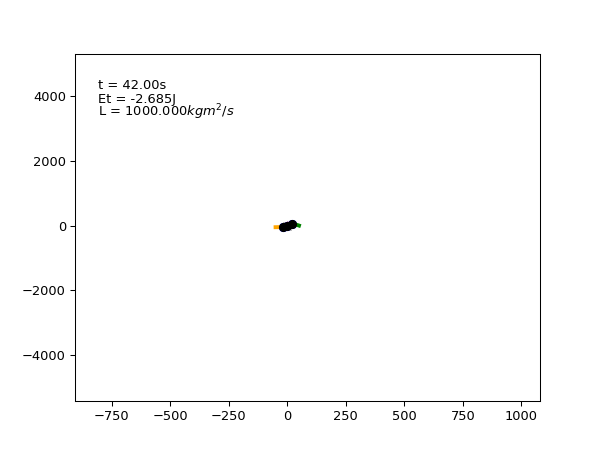

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

# carregar variáveis
file = "output_3bp.txt"
paths = np.loadtxt(file)

# Propriedades do sistema
t = paths[:,0]
Et= paths[:,1]
L = paths[:,2]

# Posições das partículas
x = paths[:,[3,5,7]]
y = paths[:,[4,6,8]]

# inicia a figura e os objetos
fig = plt.figure()
ax = plt.axes(xlim=(np.min(x), np.max(x)), ylim=(np.min(y), np.max(y)))

mat, = ax.plot([], [], 'o', color='blue')
cm,  = ax.plot([], [], 'x', color='grey')
trace1, = ax.plot([], [], ',-', lw=3, color = 'orange')
trace2, = ax.plot([], [], ',-', lw=3, color = 'green')
trace3, = ax.plot([], [], ',-', lw=3, color = 'purple')

# Imprimir os textos na animação:
t_template = 't = %.2fs'
t_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

Et_template = 'Et = %.3fJ'
Et_text = ax.text(0.05, .86, '', transform=ax.transAxes)

L_template = r'L = %.3f$kgm^2/s$'
L_text = ax.text(0.05, 0.82, '', transform=ax.transAxes)

# toma o número de frames da animação a partir do tamanho do arquivo
frames = paths.shape[0]

history_x1, history_y1 = [], []
history_x2, history_y2 = [], []
history_x3, history_y3 = [], []
line1, = ax.plot([], [], 'o-', lw=0.5, color = "black")
line2, = ax.plot([], [], 'o-', lw=0.5, color = "black")

def init():
    mat.set_data([], [])
    cm.set_data(0,0)
    trace1.set_data([],[])
    trace2.set_data([],[])
    trace3.set_data([],[])
    return mat, cm, trace1, trace2, trace3

def animate(i):
    pos_x = x[i]
    pos_y = y[i]
    mat.set_data(pos_x, pos_y) 
    cm.set_data(0,0)
    
    if len(history_x1) < frames:

        history_x1.append(pos_x[0])
        history_y1.append(pos_y[0])

        history_x2.append(pos_x[1])
        history_y2.append(pos_y[1])

        history_x3.append(pos_x[2])
        history_y3.append(pos_y[2])
    
    trace1.set_data(history_x1, history_y1)
    trace2.set_data(history_x2, history_y2)
    trace3.set_data(history_x3, history_y3)
    
    line1.set_data(pos_x, pos_y)
    #line2.set_data(pos_x, pos_y)
    
    # Texto da animação
    t_text.set_text(t_template % (t[i]))
    Et_text.set_text(Et_template % (Et[i]))
    L_text.set_text(L_template % (L[i]))
    
    return mat, cm, trace1, trace2, trace3, t_text, Et_text, L_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=2, blit=True)
#anim.save('simul.gif', writer='imagemagick', fps=15)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# carregar variáveis
file  = "output_3bp.txt"
paths = np.loadtxt(file)

# posições das partículas
x = paths[:,[3,5,7]]
y = paths[:,[4,6,8]]

plt.plot(x,y)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

# carregar variáveis
file = "output_3bp.txt"
paths = np.loadtxt(file)

t = paths[:,0]
Et= paths[:,1]
L = paths[:,2]
x = paths[:,[3,5,7]]
y = paths[:,[4,6,8]]

# inicia a figura e os objetos
fig = plt.figure()
ax = plt.axes(xlim=(np.min(x), np.max(x)), ylim=(np.min(y), np.max(y)))

cm,  = ax.plot([], [], 'x', color='grey')

planet1, = ax.plot([], [], 'o', color='blue')
trace1, = ax.plot([], [], ',-', lw=1, color='blue')
history_x1, history_y1 = [], []

planet2, = ax.plot([], [], 'o', color='red')
trace2, = ax.plot([], [], ',-', lw=1, color='red')
history_x2, history_y2 = [], []

planet3, = ax.plot([], [], 'o', color='green')
trace3, = ax.plot([], [], ',-', lw=1, color='green')
history_x3, history_y3 = [], []

# Imprimir os textos na animação:
t_template = 't = %.1fs'
t_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

Et_template = 'Et = %.1fJ'
Et_text = ax.text(0.05, .86, '', transform=ax.transAxes)

L_template = r'L = %.1f$kgm^2/s$'
L_text = ax.text(0.05, 0.82, '', transform=ax.transAxes)

# toma o número de frames da animação a partir do tamanho do arquivo
frames = paths.shape[0]

def init():
    cm.set_data(0,0)
    
    planet1.set_data([], [])
    trace1.set_data([],[])

    planet2.set_data([], [])
    trace2.set_data([],[])

    planet2.set_data([], [])
    trace2.set_data([],[])

    return cm, planet1, trace1, planet2, trace2, planet3, trace3


def animate(i):
    planet1.set_data(x[0,i], y[0,i])
    planet2.set_data(x[1,i], y[1,i])
    planet3.set_data(x[2,i], y[2,i])

    history_x1.append(x[0,i])
    history_x2.append(x[1,i])
    history_x3.append(x[2,i])

    history_y1.append(y[0,i])
    history_y2.append(y[1,i])
    history_y3.append(y[2,i])

    trace1.set_data(history_x1, history_y1)
    trace2.set_data(history_x2, history_y2)
    trace3.set_data(history_x3, history_y3)

    t_text.set_text(t_template % (t[i] * 1000))
    Et_text.set_text(Et_template % (Et[i]))
    L_text.set_text(L_template % (L[i]))
    return planet1, trace1, planet2, trace2, planet3, trace3, t_text, Et_text, L_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=2, blit=True)
#anim.save('simul.gif', writer='imagemagick', fps=15)
plt.show()